## Neural networks

In [1]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

%matplotlib inline

In [2]:
digits = sio.loadmat('data/ml-ex4/ex4data1.mat')

In [3]:
X = digits['X']
y = digits['y'].ravel()

In [4]:
clf = MLPClassifier((25,), activation='logistic', solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [5]:
clf.score(X, y)

1.0

In [6]:
cv = StratifiedShuffleSplit(2, test_size=0.1, random_state=0)
gs = GridSearchCV(clf, param_grid={'alpha':[1e-3, 1e-1, 1e1]})

gs.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.1, 10.0]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [7]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.703247,0.004109,0.8858,1.000000,0.001,{'alpha': 0.001},3,0.873054,1.000000,0.891617,1.000000,0.892771,1.000000,0.041491,0.000272,0.009039,0.000000
1,1.312286,0.003915,0.9220,1.000000,0.1,{'alpha': 0.1},1,0.917964,1.000000,0.926946,1.000000,0.921084,1.000000,0.161001,0.000595,0.003727,0.000000
2,2.070375,0.003880,0.9034,0.936002,10,{'alpha': 10.0},2,0.889820,0.939339,0.912575,0.934234,0.907831,0.934431,0.146128,0.000090,0.009810,0.002362


In [8]:
clf_best = gs.best_estimator_

In [9]:
Theta1 = clf_best.coefs_[0].T
Theta1.shape

(25, 400)

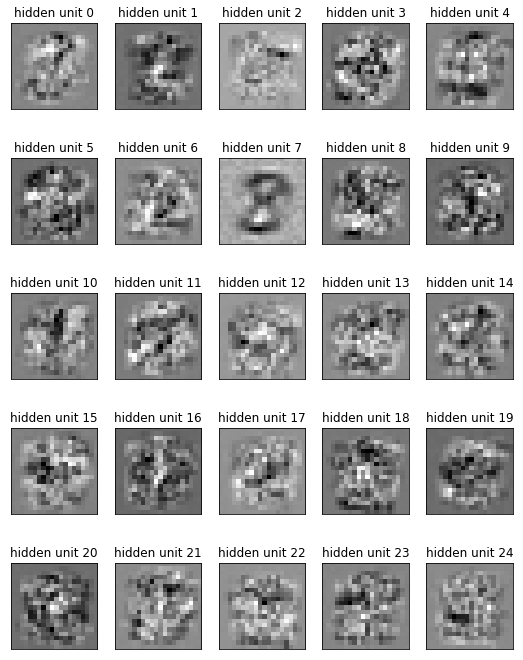

In [10]:
# Visualize hidden units (i.e. their weights from the input layer)
n_rows = 5
n_cols = 5

plt.subplots_adjust(top=.9, hspace=.4)
plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))

for i, row in enumerate(Theta1):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(row.reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'hidden unit {i}')
    plt.xticks(())
    plt.yticks(())